In [35]:
# show portion content of  the file
!head -n 10 cities.csv

New York
London
Paris
Zurich
Cairo
Buenos Aires
Moscow
Nairobi

In [36]:

# show and print notification of file content length with nice format
!wc -l cities.csv | awk '{print "Number of lines in the file: " $1}'



Number of lines in the file: 7


In [37]:
# !pip install requests

In [38]:
# Dependencies
import requests as req
import json
import csv

# OpenWeather API Key
api_key = "417bfe8effcb6b9aa355a4de24d62458"

# Specify File Path
csvpath = "cities.csv"

# Build an endpoint URL to the OpenWeatherMap Service
url = "http://api.openweathermap.org/data/2.5/weather?"

# Open output file
output_file = "output.csv"
with open(output_file, "w") as csvfile:
    # Initialize the csv.writer
    csvwriter = csv.writer(csvfile, delimiter=",")

    # Read CSV
    with open(csvpath) as csvfile:

        # Read the file specifying commas as delimiters
        csvreader = csv.reader(csvfile)

        # Iterate through each row of the CSV
        for row in csvreader:

            # Retrieve the city name from the CSV file
            city = row[0]

            # Print each row of the csv
            print(city)

            # Build the query URL for the OpenWeatherMap Service
            query_url = url + "q=" + city + "&appid=" + api_key + "&units=Imperial"

            # Make a request to the OpenWeatherMap Service
            weather_response = req.get(query_url)
            weather_json = weather_response.json()

            # Print the JSON for each
            print(weather_json)

            # Extract the temperature for each city
            temperature = weather_json["main"]["temp"]

            # Print the Temperatures
            print(temperature)

            # Draw a separating line
            print("---------------")

            # Write the contents for each to the output CSV
            csvwriter.writerow([city, temperature])

New York
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.73, 'feels_like': 23.81, 'temp_min': 31.51, 'temp_max': 35.22, 'pressure': 1022, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1678354373, 'sys': {'type': 2, 'id': 2039034, 'country': 'US', 'sunrise': 1678360680, 'sunset': 1678402529}, 'timezone': -18000, 'id': 5128581, 'name': 'New York', 'cod': 200}
33.73
---------------
London
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 311, 'main': 'Drizzle', 'description': 'drizzle rain', 'icon': '09d'}, {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 39.58, 'feels_like': 32.07, 'temp_min': 37.29, 'temp_max': 42.37, 'pressure': 993, 'humidity': 96}, 'visibility': 3200, 'wind': {'speed': 12.66, 'deg': 100}, 'rain': {'1h': 0.11}, 

In [39]:
# make the output file readable
!cat output.csv


New York,33.73
London,39.58
Paris,53.89
Zurich,51.8
Cairo,74.16
Buenos Aires,75.54
Moscow,30.51
Nairobi,80.94


In [40]:
# create a new output_full file that contains all the data features
output_full_file = "output_full.csv"
with open(output_full_file, "w") as csvfile:
    # Initialize the csv.writer
    csvwriter = csv.writer(csvfile, delimiter=",")

    # Read CSV
    with open(csvpath) as csvfile:

        # Read the file specifying commas as delimiters
        csvreader = csv.reader(csvfile)

        # Iterate through each row of the CSV
        for row in csvreader:

            # Retrieve the city name from the CSV file
            city = row[0]

            # Print each row of the csv
            print(city)

            # Build the query URL for the OpenWeatherMap Service
            query_url = url + "q=" + city + "&appid=" + api_key + "&units=Imperial"

            # Make a request to the OpenWeatherMap Service
            weather_response = req.get(query_url)
            weather_json = weather_response.json()

            # Print the JSON for each
            print(weather_json)

            # Extract the temperature for each city
            temperature = weather_json["main"]["temp"]
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"]
            latitude = weather_json["coord"]["lat"]
            longitude = weather_json["coord"]["lon"]

            # Print the Temperatures
            print(temperature)

            # Draw a separating line
            print("---------------")

            # Write the contents for each to the output CSV
            csvwriter.writerow([city, temperature, humidity, cloudiness, wind_speed, latitude, longitude])

# make the output_full file readable
!cat output_full.csv


New York
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.73, 'feels_like': 23.81, 'temp_min': 31.51, 'temp_max': 35.22, 'pressure': 1022, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1678354373, 'sys': {'type': 2, 'id': 2039034, 'country': 'US', 'sunrise': 1678360680, 'sunset': 1678402529}, 'timezone': -18000, 'id': 5128581, 'name': 'New York', 'cod': 200}
33.73
---------------
London
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 311, 'main': 'Drizzle', 'description': 'drizzle rain', 'icon': '09d'}, {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 39.58, 'feels_like': 32.07, 'temp_min': 37.29, 'temp_max': 42.37, 'pressure': 993, 'humidity': 96}, 'visibility': 3200, 'wind': {'speed': 12.66, 'deg': 100}, 'rain': {'1h': 0.11}, 

In [41]:
# add a row header to the output_full file
import pandas as pd
df = pd.read_csv("output_full.csv", header=None)
df.columns = ["City", "Temperature (F)", "Humidity", "Cloudiness", "Wind Speed", "Latitude", "Longitude"]
df.to_csv("output_full.csv", index=False)

# make the output_full file readable
!cat output_full.csv

City,Temperature (F),Humidity,Cloudiness,Wind Speed,Latitude,Longitude
New York,33.73,67,75,14.97,40.7143,-74.006
London,39.58,96,100,12.66,51.5085,-0.1257
Paris,53.89,84,100,14.97,48.8534,2.3488
Zurich,51.8,68,20,16.11,47.3667,8.55
Cairo,74.16,21,0,3.44,30.0626,31.2497
Buenos Aires,75.54,81,0,8.05,-34.6132,-58.3772
Moscow,30.51,85,100,11.99,55.7522,37.6156
Nairobi,80.94,26,20,10.36,-1.2833,36.8167


In [44]:
# create a fucntion to convert the temperature from Fahrenheit to Celsius and add a new column next to temperature (F) for Temperature (C) and use 2 decimal places
def fahrenheit_to_celsius(fahrenheit):
    return round((fahrenheit - 32) * 5/9, 2)

df["Temperature (C)"] = df["Temperature (F)"].apply(fahrenheit_to_celsius)
df.to_csv("output_full.csv", index=False)

# make the output_full file readable
!cat output_full.csv




City,Temperature (F),Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Temperature (C)
New York,33.73,67,75,14.97,40.7143,-74.006,0.96
London,39.58,96,100,12.66,51.5085,-0.1257,4.21
Paris,53.89,84,100,14.97,48.8534,2.3488,12.16
Zurich,51.8,68,20,16.11,47.3667,8.55,11.0
Cairo,74.16,21,0,3.44,30.0626,31.2497,23.42
Buenos Aires,75.54,81,0,8.05,-34.6132,-58.3772,24.19
Moscow,30.51,85,100,11.99,55.7522,37.6156,-0.83
Nairobi,80.94,26,20,10.36,-1.2833,36.8167,27.19


In [46]:
# install the citipy package
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.7/557.7 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=9b143e203839ffa6ec47d87743d72d415be5f3a4e2e73f9e3b63746f3839b847
  Stored in directory: /Users/ops/Library/Caches/pip/wheels/7d/3b/17/beb4cd09d241b4467d6b2316bc6483daaf1150d049a8659b8c
Successfully built citipy


In [53]:
# Citypy library to find the nearest city to the coordinates of the cities in the csv file 
from citipy import citipy

# create a list to store the nearest cities
nearest_cities = []

# iterate through the cities in the csv file
for index, row in df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    nearest_cities.append(city.city_name)

# add the nearest cities to the dataframe
df["Nearest City"] = nearest_cities
df.to_csv("output_full.csv", index=False)

# make the output_full file readable
!cat output_full.csv

# create a new output_full file that contains all the data features
output_full_file = "output_full.csv"
with open(output_full_file, "w") as csvfile:
    # Initialize the csv.writer
    csvwriter = csv.writer(csvfile, delimiter=",")

    # Read CSV
    with open(csvpath) as csvfile:

        # Read the file specifying commas as delimiters
        csvreader = csv.reader(csvfile)

        # Iterate through each row of the CSV
        for row in csvreader:

            # Retrieve the city name from the CSV file
            city = row[0]

            # Print each row of the csv
            print(city)

            # Build the query URL for the OpenWeatherMap Service
            query_url = url + "q=" + city + "&appid=" + api_key + "&units=Imperial"

            # Make a request to the OpenWeatherMap Service
            weather_response = req.get(query_url)
            weather_json = weather_response.json()

            # Print the JSON for each
            print(weather_json)

            # Extract the temperature for each city
            temperature = weather_json["main"]["temp"]
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"]
            latitude = weather_json["coord"]["lat"]
            longitude = weather_json["coord"]["lon"]

            # Print the Temperatures
            print(temperature)

            # Draw a separating line
            print("---------------")

            # Write the contents for each to the output CSV
            csvwriter.writerow([city, temperature, humidity, cloudiness, wind_speed, latitude, longitude])

# make the output_full file readable
!cat output_full.csv



City,Temperature (F),Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Temperature (C),Nearest City
New York,33.73,67,75,14.97,40.7143,-74.006,0.96,new york
London,39.58,96,100,12.66,51.5085,-0.1257,4.21,london
Paris,53.89,84,100,14.97,48.8534,2.3488,12.16,paris
Zurich,51.8,68,20,16.11,47.3667,8.55,11.0,zurich
Cairo,74.16,21,0,3.44,30.0626,31.2497,23.42,cairo
Buenos Aires,75.54,81,0,8.05,-34.6132,-58.3772,24.19,san vicente
Moscow,30.51,85,100,11.99,55.7522,37.6156,-0.83,moscow
Nairobi,80.94,26,20,10.36,-1.2833,36.8167,27.19,nairobi
New York
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.73, 'feels_like': 23.81, 'temp_min': 31.24, 'temp_max': 35.22, 'pressure': 1021, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1678355187, 'sys': {'type': 2, 'id': 2039034, 'country': 'US', 'sunrise': 1678360680, 'sunse

In [48]:
# install seaborn
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1


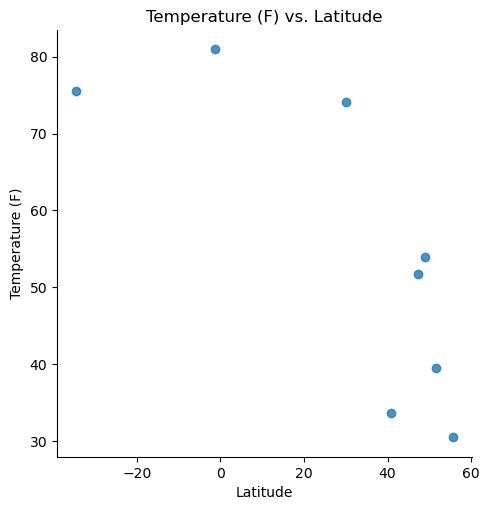

In [52]:
# create a scatter plot of temperature (F) vs. latitude
import seaborn as sns   
sns.lmplot(x="Latitude", y="Temperature (F)", data=df, fit_reg=False)
plt.title("Temperature (F) vs. Latitude")
plt.show()

